<a href="https://colab.research.google.com/github/kay0710/SOCAR-AI-BOOT-CAMP/blob/main/Lab_2_2_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2-2. Decision Tree

 ### 간단하교 효과적인 머신러닝 툴인 Scikit-learn 패키지를 사용한 Decision Tree Tutorial
*   Classification Tree, Regression Tree
*   Random Forest, Gradient Boost

[Ref.]
*   https://scikit-learn.org/stable/modules/tree.html
*   https://scikit-learn.org/stable/modules/ensemble.html






---
## Classification Tree


### Load Diabetes Dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
diabetes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ch2/data/diabetes.csv')
print(diabetes.columns)
diabetes.head()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Visualization 을 위해 input feature의 label 들을 미리 list로 저장

diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8] # output 으로 활용한 9번째 label (Outcome) 은 제외하고 저장

In [ ]:
diabetes_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
print("dimension of diabetes data: {}".format(diabetes.shape))

dimension of diabetes data: (768, 9)


### Split and prepare the dataset

In [ ]:
# data-set 나누기
train = diabetes[:650]
test = diabetes[650:]

In [ ]:
x_train = np.asarray(train.drop('Outcome',1))
y_train = np.asarray(train['Outcome'])
x_test = np.asarray(test.drop('Outcome',1))
y_test = np.asarray(test['Outcome'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


### Decision Tree

In [ ]:
from sklearn import tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# random_state = 0: tree를 만들 때 random한 요소가 들어가게 되면 매번 실행할 때마다 tree 가 다르게 만들어지므로 이를 고정하기 위한 설정
clf = DecisionTreeClassifier(random_state=0) # split의 기준: Gini (by default)
# 내장 함수 fit을 통해 바로 tree 를 만들어준다
# 인수: (input_feature, target_variable)  // target 은 classifiaction 이므로 class가 된다
clf.fit(x_train, y_train)
# 내장 함수 score 를 통해서 정확도를 측정할 수 있음
print("Accuracy on training set: {:.3f}".format(clf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(x_test, y_test)))

# 현재 training set과 test set 의 정확도 차이가 많음 >> overfitting 되었다는 것 >> 새로운 data 에 대한 generalize가 안되고 있음

Accuracy on training set: 1.000
Accuracy on test set: 0.703


트레이닝 셋에서의 정확도는 100%이나, 테스트셋에서의 정확도는 떨어짐. 즉, overfitting 되어 새로운 데이터에 generalize가 안된다는 뜻.

#### Visualize Tree

[Ellipsis]

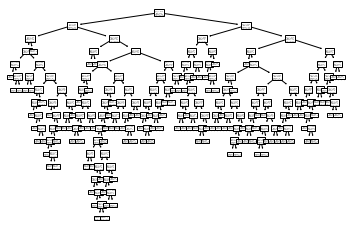

In [ ]:
tree.plot_tree(clf)
[...]
# plot_tree 함수: 인수로 들어온 tree 를 그려 줌
# 엄청 복잡한 tree >> 눈으로 봐도 overfitting 을 예상할 수 있음

 Pre-pruning, max_depth=3 으로 설정해서 오버피팅을 방지한다. 트레이닝 셋에서의 정확도는 떨어지지만, 테스트 셋에서의 성능은 올라간다. 
 그 외에도 [post pruning with cost complexity pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)를 활용할 수 있다.

In [ ]:
# Overfitting 방지하기 >> tree 의 Max_depth 를 설정 
#  Pre-pruning: tree 를 만드는 과정에서 가지치기를 미리 한다는 의미
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(clf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(x_test, y_test)))

Accuracy on training set: 0.783
Accuracy on test set: 0.763


[Ellipsis]

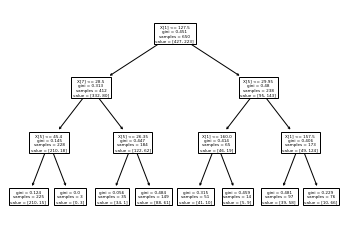

In [ ]:
tree.plot_tree(clf)
[...]

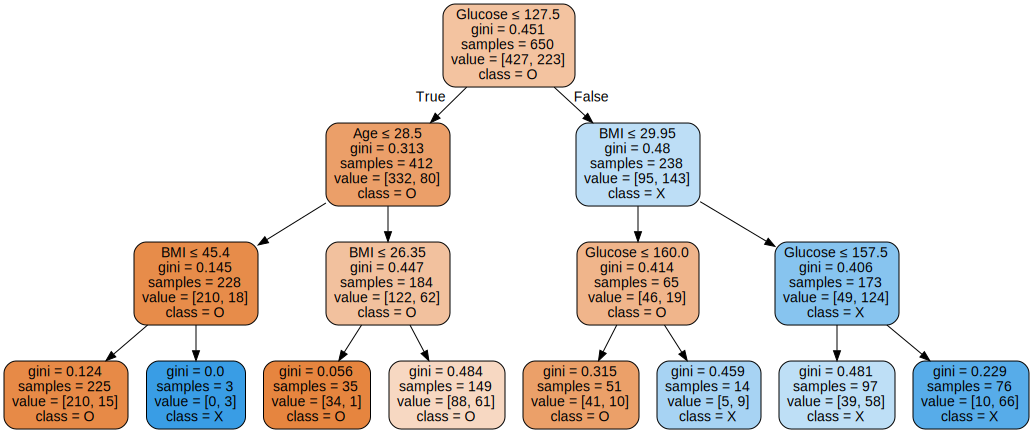

In [ ]:
import graphviz # tree 를 visualize 할 수 있는 module
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=diabetes_features,  
                     class_names=['O','X'],  
                     filled=True, rounded=True,  
                     special_characters=True)  # visualize 하기 위해 필요한 정보들을 입력
graph = graphviz.Source(dot_data)  
graph 

#### Feature importance in Decision trees
강의에서 다룬 Variable Importance Measure와 같음.
각각의 예측변수가 decision에 있어서 얼마나 중요한지 0과 1사이의 값으로 모두 합쳐서 1이 되도록 나타냄

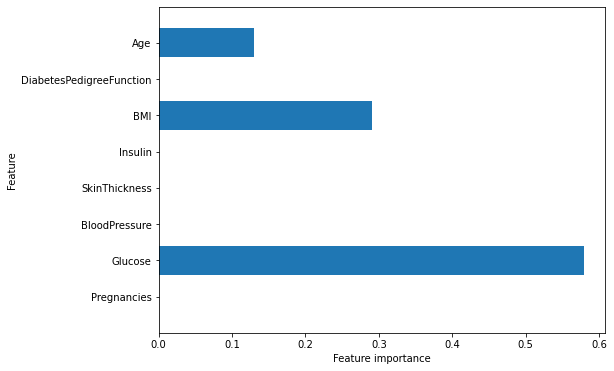

In [ ]:
# Gradient boosting 은 설명력이 떨어짐 >> Variable Importance Measure 를 사용 >> sklearn 의 tree 에 구현되어 있음
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(clf)

### Random Forest

diabetes dataset에 100개의 트리로 구성된 Random Forest를 적용해보자.

In [ ]:
# randomforest 역시 sklearn 에 구현되어 있음
from sklearn.ensemble import RandomForestClassifier

# number of estimateors: 총 tree 의 수
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(x_test, y_test)))
# 현재 결과는 overfitting + single tree 보다 떨어지는 성능

Accuracy on training set: 1.000
Accuracy on test set: 0.754


75.4%의 성능으로, Single tree 모델보다 성능이 떨어짐. 또한, Overfitting됨
따라서 max_features를 줄이고, max_depth를 준다.

In [ ]:
# overfitting 막기
# random forest 에서는 spliting 을 할 때마다 전체 input 예측 변수의 수를 p개 라고 하면
# > split에 고려하는 예측변수의 수를 (루트 p) 개로 제한하고 그 중 sampling 을 통해서 뽑음으로서 tree 들이 random하게 생기도록 함. >> tree 들 간의 correlation 을 줄임
# > default로 max_feature 는 (루트 input_feature) 로 설정됨 (예시의 경우 (루트 8) 이 default 지만 더 줄여서 2를 대입함)
# 추가로 max_depth 도 제한
rf1 = RandomForestClassifier(max_features=2, max_depth=3, n_estimators=100, random_state=0)
rf1.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(x_test, y_test)))

# 그 결과 차이도 줄어들고 성능도 올라옴

Accuracy on training set: 0.792
Accuracy on test set: 0.771


#### Feature importance in Random Forest

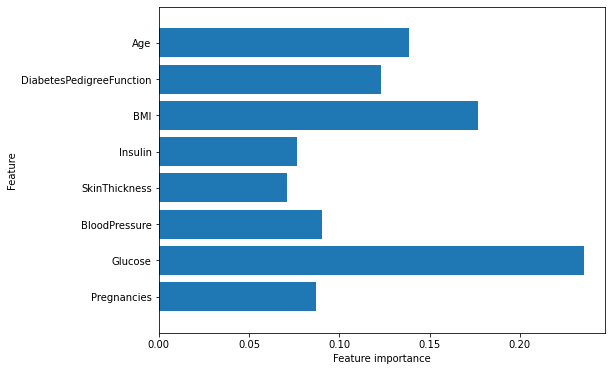

In [ ]:
plot_feature_importances_diabetes(rf)
# 이전과 다르게 Glucose, BMI, Age 외의 변수들도 importance 가 어느정도로 올라옴
# > random forest 에서 split 을 할 때 sampling 을 통해 (루트 p)개 혹은 max_feature 로 split 에 고려하는 변수의 수를 제한하는데
# > 이 때 Glucose, BMI, Age가 sampling 에 뽑히지 않으면 제외되므로 다른 변수들이 분기의 조건으로 설정되어 importance 가 올라옴

Single tree와 마찬가지로 글루코스와 BMI의 중요도가 높음. 반면, Random forest의 randomness 때문에 더 다양한 변수들을 고려하는걸 볼 수 있다.

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(x_test, y_test)))
# 현재 결과는 overfitting

Accuracy on training set: 0.914
Accuracy on test set: 0.771


overfitting을 줄이기 위해서, maximum depth로 pre-pruning을 해준다.

In [ ]:
# Overfitting 막기 - 방법1 (max_depth 제한)
# max_depth 의 default 가 3 이라 이보다 더 단순하게 해야 overfitting을 줄일 수 있음 >> 따라서 2로 설정

gb1 = GradientBoostingClassifier(random_state=0, max_depth=2) 
gb1.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb1.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb1.score(x_test, y_test)))

# 이 경우 overfitting 은 어느 정도 줄었으나 성능도 같이 줄어 듦

Accuracy on training set: 0.855
Accuracy on test set: 0.754


In [ ]:
# Overfitting 막기 - 방법2 (learning_rate 제한)
# learning_rate 의 default 는 0.1 이라 이를 0.01로 더 줄여서 실행
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(gb2.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb2.score(x_test, y_test)))

# 이 경우도 overfitting 은 어느 정도 줄었으나 성능도 같이 줄어 듦

# 일반 적으로 Boosting 이 random forest나 decision tree 보다 성능이 좋지만, 이 경우는 그 성능이 떨어지는 결과가 나옴
# Algorithm 의 성능관계가 항상 절대적인 것은 아님을 알 수 있음

Accuracy on training set: 0.797
Accuracy on test set: 0.754


두 방법 모두 모델의 complexity를 줄이면서 training set의 성능이 test set과 가까워졌다. 그러나 test set에서의 성능이 딱히 개선되지 않았다.

#### Feature importance in Gradient Boosting

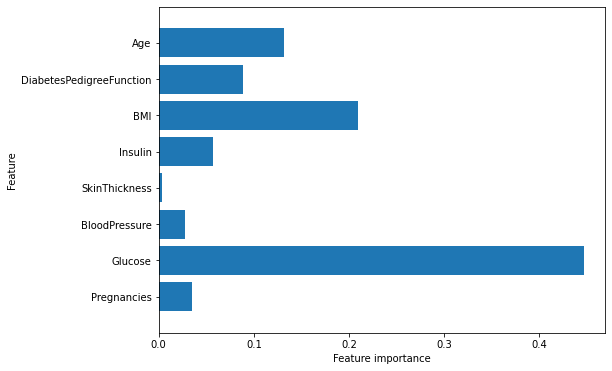

In [ ]:
plot_feature_importances_diabetes(gb1)

Random forest의 feature importance와 비슷함.



---
## Regression Tree



### Simple regression tree using synthetic data

In [ ]:
# Sythetic data: 우리가 random 하게 sampling 을 통해서 data-set을 직접 만들어 주는 것

In [ ]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [ ]:
# Create a random dataset
rng = np.random.RandomState(1)
# 0~1 사이 80개의 수를 random 하게 뽑고 이에 5를 곱해서 sorting
# >> 그 결과 0~5 사이 80개의 random한 data-set 이 생성
X = np.sort(5 * rng.rand(80, 1), axis=0)
# X가 (80,1) 이라는 2차원 함수인데 ravel 함수를 통해 1차원으로 설정해 줌
y = np.sin(X).ravel()
# 5 간격으로 임의로 sampling 한 값을 더해줌 >> 의도적으로 noise가 낀 data 를 생성
y[::5] += 3 * (0.5 - rng.rand(16))

In [ ]:
# Fit regression model
# max_depth 를 다르게 해 서로 다른 tree 2개를 만들고
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
# 각각 학습을 진행
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [ ]:
# Predict
# input 은 0~5 사이 값은 0.01 간격으로 설정
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
# predict 함수의 인수로 test-set 의 input 값을 넣어주면 output 값을 알 수 있음
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)


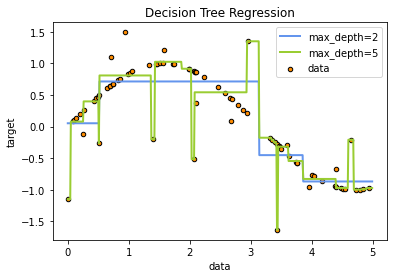

In [ ]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# data 들 중간에 튀는 값들은 의도적으로 noise 를 섞어준 data들
# max_depth 값이 5인 경우는 noise 가 낀 data에 대해서도 많이 overfitting이 됨 >> 예측 값들이 상당히 들쑥날쑥 함
# 이런 경우는 max_depth를 보다 줄이는 것이 낫다는 것을 알 수 있음

### Regression Tree with Tada ETA data



*   ATA: Actual Time of Arrival (실제 도착시간)
*   ETA: Expected Time of Arrival (호출 시 예상되는 도착시간)
*   api_eta: 앱 API에서 예측된 ETA



In [ ]:
tada_eta = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ch2/data/tada_eta.xlsx')
print(tada_eta.columns)
tada_eta.head()
# ATA 가 맞춰야할 Target variable
# 나머지는 Input variables >> 일부 data 는 의미있는 data로 전차리할 필요가 있음

Index(['ATA', 'id', 'api_eta', 'created_at_kst', 'month', 'pickup_lng',
       'pickup_lat', 'pickup_gu', 'driver_id', 'driver_lng', 'driver_lat',
       'hour'],
      dtype='object')


,ATA,id,api_eta,created_at_kst,month,pickup_lng,pickup_lat,pickup_gu,driver_id,driver_lng,driver_lat,hour
0,10.60,R4L9FL6NVEL4D0,5.65,2019-12-01T00:55:09,12,127.091399,37.624545,노원구,DST52944,127.069978,37.616472,0
1,9.20,R3A7JBY7CS6TPD,8.60,2019-12-01T00:09:39,12,127.023351,37.625564,강북구,DPC72995,127.026479,37.604711,0
2,10.85,R2BIUY1TDK14XE,10.53,2019-12-15T00:18:42,12,126.881154,37.481641,금천구,DPP94923,126.906225,37.452167,0
3,5.52,R31PU5GNHSGU6C,1.92,2019-07-31T00:24:11,7,126.988375,37.567897,중구,DCT73585,126.991170,37.566416,0
4,8.60,R41WR6N1VT42DJ,7.10,2019-07-05T00:40:34,7,126.988684,37.566716,중구,DPJ86237,127.006860,37.571164,0


In [ ]:
# Data 전처리
# 호출위치와 driver의 위치인 위,경도 자체는 큰 의미가 없음
# > 두 위치의 위경도 차이를 비교해 위치간 거리를 보는 것이 더 합당함!!
# > 따라서 'distance' 라는 새로운 column을 만들어서 계산 (*100000 을 통해 scaling 도 적용)
tada_eta['distance'] = ((tada_eta['pickup_lat']-tada_eta['driver_lat'])**2 + (tada_eta['pickup_lng']-tada_eta['driver_lng'])**2)*100000

# eta 를 찾는데 큰 도움이 되지 않는 data들은 제거
tada_eta = tada_eta.drop(['id', 'created_at_kst', 'driver_id', 'pickup_lng', 'pickup_lat', 'driver_lng','driver_lat','pickup_gu'],1)
tada_eta.head()

# sklearn의 tree는 범주 데이터(ex 구 들의 표시)는 다루지 못함
# > 이 경우에 one-hot encoding(각 구를 의미하는 variable들을 각각 생성)을 할 수 있으나 이는 variable 들이 많아지므로 overfitting이 되고 성능이 떨어짐 (비효율적)
# > 구 데이터도 활용하고 싶다면 h2o 참고

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,ATA,api_eta,month,hour,distance
0,10.60,5.65,12,0,52.400202
1,9.20,8.60,12,0,44.465889
2,10.85,10.53,12,0,149.731535
3,5.52,1.92,7,0,1.000535
4,8.60,7.10,7,0,35.014797


In [ ]:
# 위 data는 시간 순으로 정렬이 되어 있어 hour 값이 모두 0 으로 나오므로
# 이를 섞어서 hour 값이 더 다양하게 만들어보자

# panda 의 내장함수 sample 은 그 안에서 data sample들을 뽑는데 'frac' 은 전체 수에서 sampling 할 비율을 의미 (즉, 'frac = 1' 은 전체 data 를 모두 sampling 할 것이라는 뜻)
# reset_index 를 통해 새로 idx 를 지정.
tada_eta = tada_eta.sample(frac=1).reset_index(drop=True)
tada_eta.head()

,ATA,api_eta,month,hour,distance
0,6.65,6.13,12,9,27.699946
1,5.28,2.65,12,17,0.723174
2,6.12,6.00,12,14,6.369016
3,6.22,8.35,7,19,47.722209
4,6.17,5.12,12,1,16.080441


In [ ]:
tada_eta.shape
# data 는 13,916개, 변수는 5개 임을 확인

(13916, 5)

In [ ]:
# data-set 분리
train = tada_eta[:12000]
test = tada_eta[12000:]

In [ ]:
# input variabls 와 target variable 을 분리
# target variable 이 'ATA' 이므로 나머지를 input 으로 설정

x_train = np.asarray(train.drop('ATA',1))
y_train = np.asarray(train['ATA'])
x_test = np.asarray(test.drop('ATA',1))
y_test = np.asarray(test['ATA'])
# visualization을 위해 inupt feature 들의 이름을 미리 저장
eta_features = [x for i,x in enumerate(tada_eta.columns) if i!=0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
eta_features

['api_eta', 'month', 'hour', 'distance']

#### Gradient Boosting 사용

In [ ]:
# Gradient Boosting을 할 때 그 안에서 사용되는 parameter 들을 지정
# number of estiamtors: tree 의 수 
# min_samples_leaf: leaf node 의 최소 sample 수
# 'loss' : 'ls' 에서 'ls' 는 list square 의 줄임말 >> 'sum of squared_error'와 같음
params = {'n_estimators': 500,
          'max_depth': 3,
           'min_samples_leaf': 5,
          'learning_rate': 0.05,
          'loss': 'ls'} 

In [ ]:
# 성능 측정을 위한 import
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error # error를 제곱해 평균을 취하는 것이 아닌 절댓값을 취하는 것!!
from sklearn import ensemble # GradientBoostingRegressor 는 tree module 이 아닌 ensemble module 에 있음

In [ ]:
# 학습 진행
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train)

# MSE 를 위해 test set 에 대한 prediect 를 한 후 target vairable 과 같이 mse 를 계산
mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
# input_variable 의 첫 column 은 'api_eta' (ATA 는 target variable 이라 제외했으므로)
# ATA 와 최초 제공된 api_eta 와 비교를 해서 model 의 성능을 확인
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

# MAE 를 위해 test set 에 대한 prediect 를 한 후 target vairable 과 같이 mae 를 계산
mae = mean_absolute_error(y_test, reg.predict(x_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
# ATA 와 최초 제공된 api_eta 와 비교를 해서 model 의 성능을 확인
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

# 결과
# MSE, MAE 모두 최초 api_eta 보다 학습한 Model 의 error 가 더 적음

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


The mean squared error (MSE) on test set: 7.6103
The initial error of API ETA on test set: 12.6466
The mean absolute error (MAE) on test set: 2.0417
The initial error of API ETA on test set: 2.6075


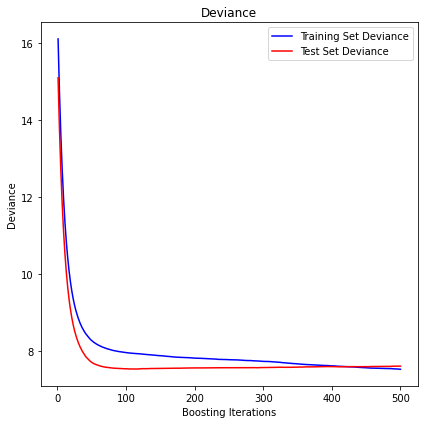

In [ ]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

# 'staged_predict' 를 통해 학습이 잘 되고 있는지, 너무 많이 시키는 것은 아닌지 등을 확인 가능
# 학습을 하는 중간중간에 model에 대한 test를 진행
for i, y_pred in enumerate(reg.staged_predict(x_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
# training 과정에서의 중간마다 training loss 는 'train_score_' 에 기본적으로 저장됨 
# 이를 'test_score' 와 같이 plot 으로 표현하면 비교 가능
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

# 결과적으로 필요한 학습은 100번 정도에서 완료되었고 그 이후는 overfitting 되고 있음을 확인
# >> n_estimators 를 100 으로 수정하는 것이 좋음

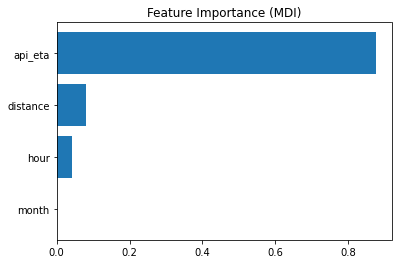

In [ ]:
# variable importance measured 확인
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure()
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(eta_features)[sorted_idx])
plt.title('Feature Importance (MDI)')
plt.show()

### HW 2: Make a better model for TADA ETA data
tree parameter를 바꾸거나, 아예 다른 알고리즘을 사용해도 됨.
트레이닝 데이터도 조작해도 되지만, 테스트셋은 조작 금지 (Fair 한 비교가 가능)

```
test = tada_eta[12000:]
```



[Ref.]
*   https://scikit-learn.org/stable/modules/tree.html
*   https://scikit-learn.org/stable/modules/ensemble.html


In [ ]:
# mse = mean_squared_error(y_test, reg.predict(x_test))
# print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
# print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

# mae = mean_absolute_error(y_test, reg.predict(x_test))
# print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
# print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))